# Group Project Proposal

In [47]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks readr::spec()
✖ recipes::step()   masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



In [35]:
wine_data <- read_csv2("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", col_names = TRUE)
slice(wine_data, 1:5)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5


In [83]:
colnames(data)[1] <- "fixed_acidity"
colnames(data)[2] <- "volatile_acidity"
colnames(data)[3] <- "citric_acid"
colnames(data)[4] <- "residual_sugar"
colnames(data)[5] <- "chlorides"
colnames(data)[6] <- "free_sulfur_dioxide"
colnames(data)[7] <- "total_sulfur_dioxide"
colnames(data)[8] <- "density"
colnames(data)[9] <- "pH"
colnames(data)[10] <- "sulphates"
colnames(data)[11] <- "alcohol"
colnames(data)[12] <- "quality"
wine_data <- mutate(data, quality = as.factor(quality),
               volatile_acidity = as.numeric(volatile_acidity),
               citric_acid = as.numeric(citric_acid),
               density = as.numeric(density),
               chlorides = as.numeric(chlorides),
              sulphates = as.numeric(sulphates))
# wine_data |> summarize(across(fixed_acidity : quality, na.rm = TRUE))
slice(wine_data, 1:5)

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5


In [156]:
wine_selected <- wine_data |> select(volatile_acidity, citric_acid, quality)
wine_selected |> group_by(quality) |> summarize(count = n()) # example of the number of observation each class in quality
wine_selected[!complete.cases(wine_selected), ] # no rows have missing data
wine_selected |> select(volatile_acidity, citric_acid) |> map(mean) # showing the mean of two predictors

quality,count
<fct>,<int>
3,10
4,53
5,681
6,638
7,199
8,18


volatile_acidity,citric_acid,quality
<dbl>,<dbl>,<fct>


$volatile_acidity
[1] 0.5278205

$citric_acid
[1] 0.2709756

In [137]:
wine_split <- initial_split(wine_selected, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)

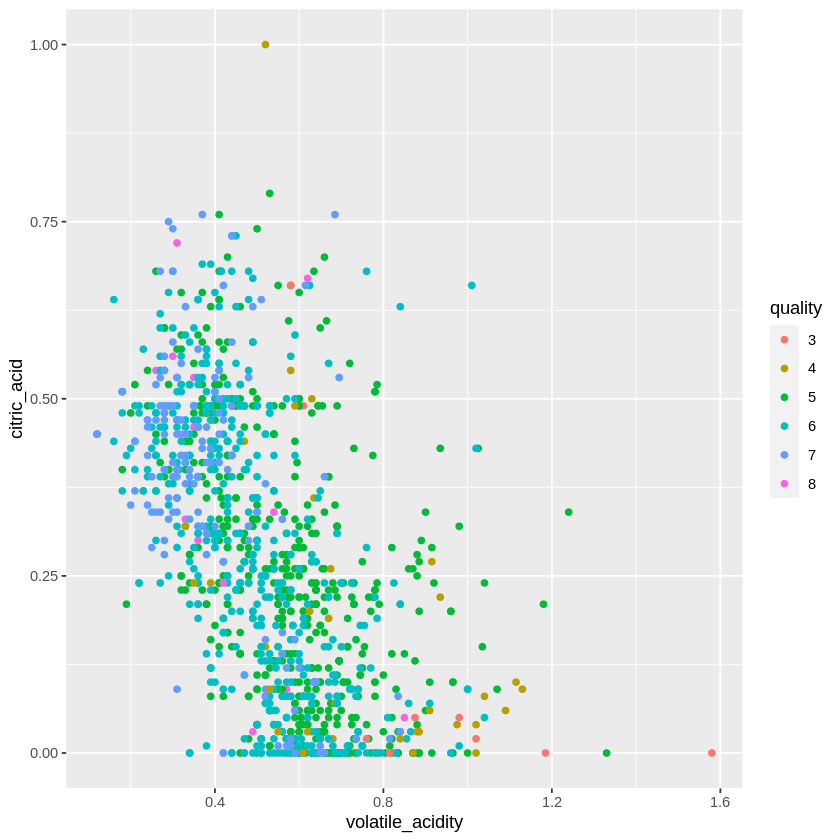

In [138]:
sample_plot<- ggplot(wine_training, aes(x = volatile_acidity, y = citric_acid, color = quality)) + geom_point()
sample_plot

Warning message:
“Removed 2 rows containing missing values (geom_point).”


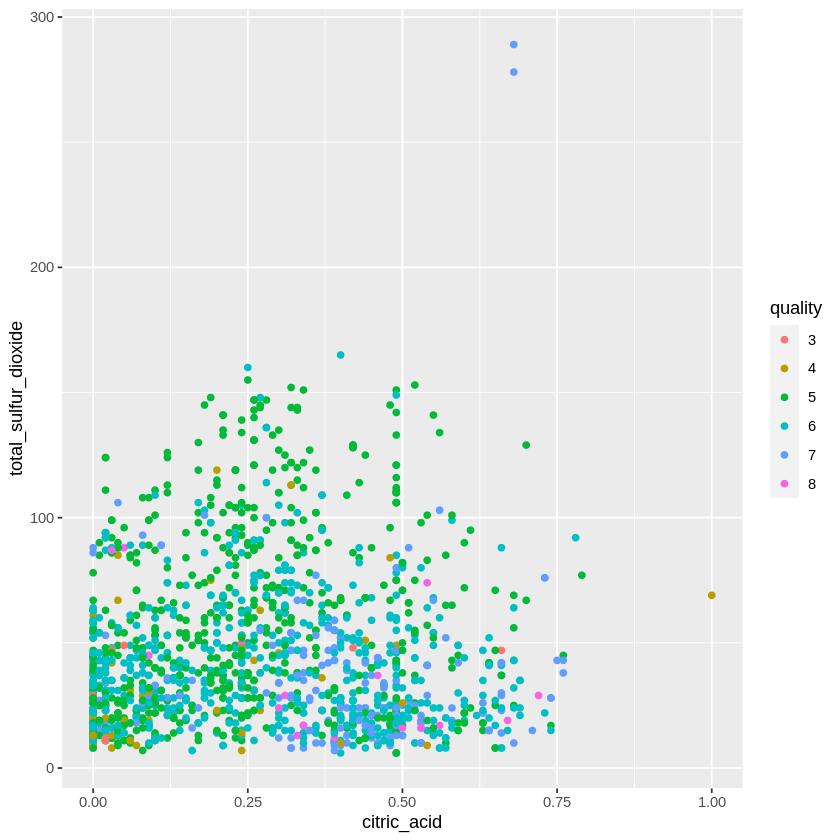

In [140]:
sample_plot2 <- ggplot(wine_data, aes(x = citric_acid, y = total_sulfur_dioxide, color = quality)) + geom_point()
sample_plot2